In [4]:
import csv
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

# Initialize the FDSN client
client = Client("IRIS")

# Define the time range for the station availability
starttime = UTCDateTime("2025-01-15")
endtime = UTCDateTime("2025-02-16")

# Retrieve station metadata
#inventory = client.get_stations(network="OK,O2,2V,AG,AM,GM,N4,C0,GS,TX,US,XX", station="*", channel="HH*", starttime=starttime, endtime=endtime, level="station")
inventory = client.get_stations(network="OK,O2,TX", station="*", channel="HH*", starttime=starttime, endtime=endtime, level="station")

# Open a CSV file to write the data
with open("station_network_info.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    # Write the header row
    writer.writerow(["Network Code", "Station Code", "Start Time", "End Time"])
    
    # Iterate over networks and stations to extract the required information
    for network in inventory:
        for station in network:
            writer.writerow([
                network.code,
                station.code,
                starttime.strftime("%Y-%m-%dT%H:%M:%S"),
                endtime.strftime("%Y-%m-%dT%H:%M:%S")
            ])


/var/folders/sd/gqkj0t9n16n8_qtbhd_wlhp80000gq/T/ipykernel_34892/1087456568.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="muted")


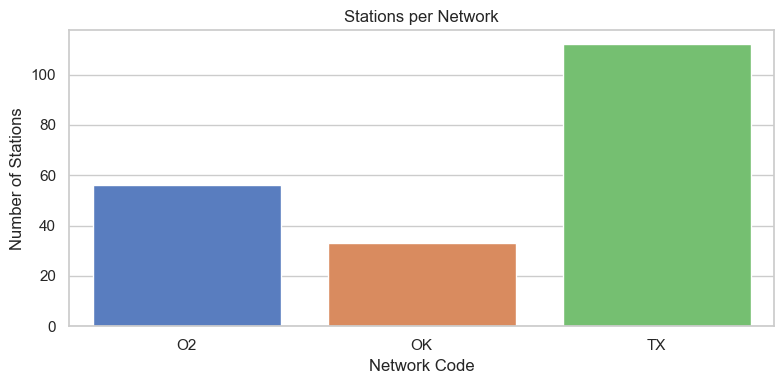

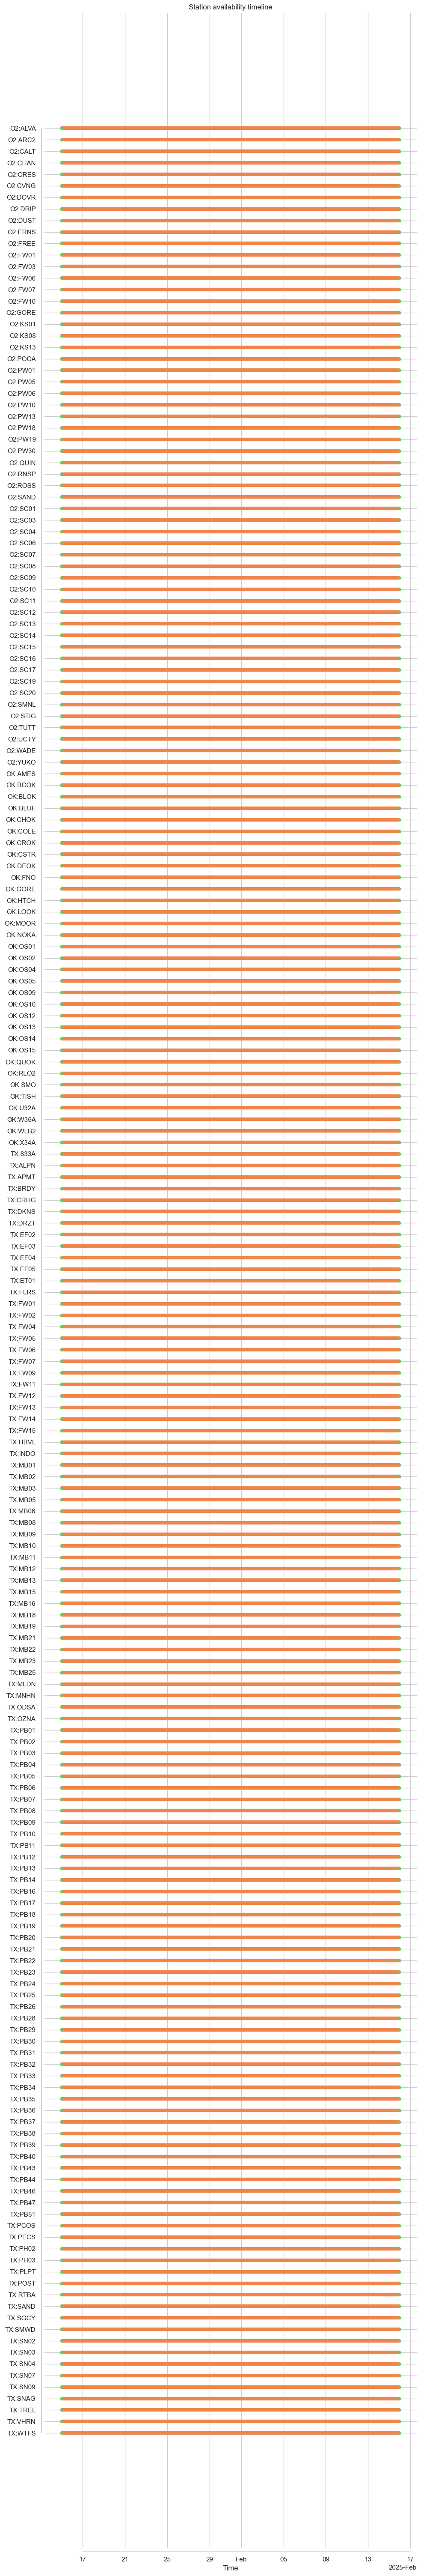

In [5]:
import seaborn as sns

# use seaborn muted aesthetic
sns.set_theme(style="whitegrid", palette="muted")

# Read the CSV written earlier
df = pd.read_csv("station_network_info.csv", parse_dates=["Start Time", "End Time"])

# Quick bar chart: number of stations per network (seaborn)
counts = df["Network Code"].value_counts().sort_index()
plt.figure(figsize=(8,4))
sns.barplot(x=counts.index, y=counts.values, palette="muted")
plt.xlabel("Network Code")
plt.ylabel("Number of Stations")
plt.title("Stations per Network")
plt.tight_layout()
plt.show()

# Gantt-like timeline per station (Network:Station)
df["StationLabel"] = df["Network Code"].astype(str) + ":" + df["Station Code"].astype(str)
labels = df["StationLabel"].unique()
ypos = {label: i for i, label in enumerate(labels[::-1])}  # reverse so first is top

plt.figure(figsize=(10, max(4, len(labels)*0.3)))
ax = plt.gca()
pal = sns.color_palette("muted")
for _, row in df.iterrows():
    y = ypos[row["StationLabel"]]
    ax.hlines(y, row["Start Time"], row["End Time"], colors=pal[1], linewidth=6)
    ax.plot(row["Start Time"], y, "o", color=pal[2], markersize=4)
    ax.plot(row["End Time"], y, "o", color=pal[2], markersize=4)

ax.set_yticks(list(ypos.values()))
ax.set_yticklabels(list(ypos.keys()))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
plt.xlabel("Time")
plt.title("Station availability timeline")
sns.despine(offset=5, trim=True)
plt.tight_layout()
plt.show()